In [1]:
## INPUT
name="RiseOfTiamat"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
%matplotlib inline

df=pd.read_csv("skills_"+name+".csv",sep=";")
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Day"]=pd.to_datetime(df["Day"])
df

,Player,Timestamp,Skill,Result,Raw,Plus,Day
0,Gruumsh,2020-04-19 19:09:00,PERSUASION,24,18,6,2020-04-19
1,Gruumsh,2020-04-19 20:24:00,INVESTIGATION,10,11,-1,2020-04-19
2,Ylva,2020-04-19 20:34:00,PERCEPTION,25,19,6,2020-04-19
3,Gruumsh,2020-04-19 20:44:00,PERFORMANCE,17,14,3,2020-04-19
4,Gruumsh,2020-04-19 21:19:00,ATHLETICS,26,19,7,2020-04-19
...,...,...,...,...,...,...,...
1048,Ylva,2020-12-11 22:08:00,INSIGHT,12,9,3,2020-11-12
1049,Ylva,2020-12-11 22:22:00,HISTORY,21,16,5,2020-11-12
1050,Parun,2020-12-11 22:34:00,INSIGHT,19,10,9,2020-11-12
1051,Parun,2020-12-11 22:34:00,INSIGHT,16,7,9,2020-11-12


## Skillchecks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'ACROBATICS'),
  Text(1, 0, 'ANIMAL HANDLING'),
  Text(2, 0, 'ARCANA'),
  Text(3, 0, 'ATHLETICS'),
  Text(4, 0, 'DECEPTION'),
  Text(5, 0, 'HISTORY'),
  Text(6, 0, 'INSIGHT'),
  Text(7, 0, 'INTIMIDATION'),
  Text(8, 0, 'INVESTIGATION'),
  Text(9, 0, 'MEDICINE'),
  Text(10, 0, 'NATURE'),
  Text(11, 0, 'PERCEPTION'),
  Text(12, 0, 'PERFORMANCE'),
  Text(13, 0, 'PERSUASION'),
  Text(14, 0, 'RELIGION'),
  Text(15, 0, 'SLEIGHT OF HAND'),
  Text(16, 0, 'STEALTH'),
  Text(17, 0, 'SURVIVAL')])

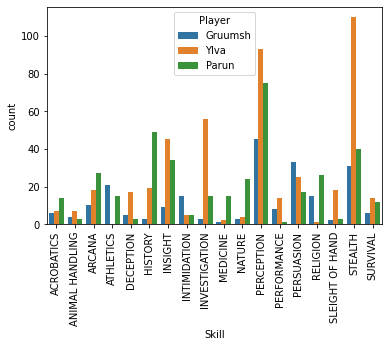

In [6]:
skills=['ACROBATICS',
 'ANIMAL HANDLING',
 'ARCANA',
 'ATHLETICS',
 'DECEPTION',
 'HISTORY',
 'INSIGHT',
 'INTIMIDATION',
 'INVESTIGATION',
 'MEDICINE',
 'NATURE',
 'PERCEPTION',
 'PERFORMANCE',
 'PERSUASION',
 'RELIGION',
 'SLEIGHT OF HAND',
 'STEALTH',
 'SURVIVAL']

ax = sns.countplot(x="Skill", hue="Player", data=df, order=skills)
plt.xticks(rotation=90)

Count of skillchecks per month and player

In [7]:
df['Timestamp'].groupby([df.Timestamp.dt.year, df.Timestamp.dt.month, df.Player]).agg('count')

Timestamp  Timestamp  Player 
2020       4          Gruumsh     8
                      Parun       2
                      Ylva        8
           5          Gruumsh    38
                      Parun      57
                      Ylva       52
           6          Gruumsh    31
                      Parun      42
                      Ylva       80
           7          Gruumsh    37
                      Parun      52
                      Ylva       56
           8          Gruumsh    27
                      Parun      76
                      Ylva       43
           9          Gruumsh    30
                      Parun      48
                      Ylva       57
           10         Gruumsh    18
                      Parun      30
                      Ylva       53
           11         Gruumsh    19
                      Parun      48
                      Ylva       73
           12         Gruumsh    12
                      Parun      23
                      Ylva       3

Average plusses on skillchecks

In [8]:
df['Plus'].groupby([df.Player]).agg('mean')

Player
Gruumsh    3.340909
Parun      5.582011
Ylva       7.112088
Name: Plus, dtype: float64

## Distribution of natural rolls

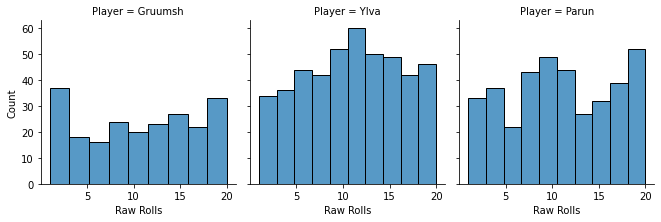

In [9]:
g = sns.FacetGrid(df,col="Player",col_wrap=4)
g.map_dataframe(sns.histplot, x="Raw")
g.set_axis_labels("Raw Rolls", "Count")

## Crits

In [10]:
crits20=df[df["Raw"]==20]
crits1=df[df["Raw"]==1]

In [11]:
crits20['Timestamp'].groupby([df.Timestamp.dt.year, df.Timestamp.dt.month, df.Player]).agg('count')
crits20['Timestamp'].groupby([df.Player]).agg('count')

Player
Gruumsh    11
Parun      26
Ylva       22
Name: Timestamp, dtype: int64

In [12]:
crits1['Timestamp'].groupby([df.Timestamp.dt.year, df.Timestamp.dt.month, df.Player]).agg('count')
crits1['Timestamp'].groupby([df.Player]).agg('count')

Player
Gruumsh    17
Parun      16
Ylva       14
Name: Timestamp, dtype: int64